# **Wadhefa Data**

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Reading file

In [4]:
df = pd.read_excel('web secraping\Wadhefa_Data_final.xlsx')

In [5]:
df.head()

Unnamed: 0                           Job Name        Date  \
0           0  Information technology technician  04/20/2023   
1           1       Sales and Marketing Engineer  04/19/2023   
2           2                      IT technician  04/18/2023   
3           3              Network administrator  04/12/2023   
4           4                   Network Engineer  04/10/2023   

                                                Link  
0  https://www.wadhefa.com/english/details/job/71...  
1  https://www.wadhefa.com/english/details/job/71...  
2  https://www.wadhefa.com/english/details/job/71...  
3  https://www.wadhefa.com/english/details/job/71...  
4  https://www.wadhefa.com/english/details/job/71...

In [6]:
#df['Link']

In [7]:
list_of_link_column = df['Link'].tolist()

In [8]:
len(list_of_link_column)

1720

# Collect  job_description

In [9]:
job_description = []

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

for i in range(len(list_of_link_column)):
    URL = list_of_link_column[i]
    website = requests.get(URL, headers=headers)
    results = BeautifulSoup(website.content, 'html.parser')
    try:
        description = results.find('td', class_='td4textarea')
        job_description.append(description.text)
    except:
        job_description.append("?")
        print(i+1)

In [10]:
#job_description[2]

In [11]:
df['job_description'] = job_description

In [12]:
df.head()

Unnamed: 0                           Job Name        Date  \
0           0  Information technology technician  04/20/2023   
1           1       Sales and Marketing Engineer  04/19/2023   
2           2                      IT technician  04/18/2023   
3           3              Network administrator  04/12/2023   
4           4                   Network Engineer  04/10/2023   

                                                Link  \
0  https://www.wadhefa.com/english/details/job/71...   
1  https://www.wadhefa.com/english/details/job/71...   
2  https://www.wadhefa.com/english/details/job/71...   
3  https://www.wadhefa.com/english/details/job/71...   
4  https://www.wadhefa.com/english/details/job/71...   

                                     job_description  
0  IT Technician required to work on all IT insta...  
1  Marketing the company's products and services ...  
2  - Troubleshoot & Resolve Technical issues and ...  
3  • Configuring & Monitoring Cisco Routers and S...  
4  - Maintain and intermittently improve our clie...

In [13]:
df['job_description']

0       IT Technician required to work on all IT insta...
1       Marketing the company's products and services ...
2       - Troubleshoot & Resolve Technical issues and ...
3       • Configuring & Monitoring Cisco Routers and S...
4       - Maintain and intermittently improve our clie...
                              ...                        
1715                                                     
1716                                                     
1717    - Technical support\r\n- Maintenance of comput...
1718    - A technician is required to install surveill...
1719    - IT Help Desk \r\n- support all IT requiremen...
Name: job_description, Length: 1720, dtype: object

In [14]:
df.to_csv('files\Wadhefa_job_data.csv')

**NLP**

In [2]:
df1 = pd.read_csv('files\Wadhefa_job_data.csv')

In [3]:
df1

Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1                1           1   
2                2           2   
3                3           3   
4                4           4   
...            ...         ...   
1715          1715         235   
1716          1716         236   
1717          1717         237   
1718          1718         238   
1719          1719         239   

                                               Job Name        Date  \
0                     Information technology technician  04/20/2023   
1                          Sales and Marketing Engineer  04/19/2023   
2                                         IT technician  04/18/2023   
3                                 Network administrator  04/12/2023   
4                                      Network Engineer  04/10/2023   
...                                                 ...         ...   
1715                      Project Technical Coordinator  11/10/2014   
1716                           Computer system engineer  11/10/2014   
1717                                       IT Help Desk  09/10/2014   
1718  Technical surveillance cameras and security de...  09/08/2014   
1719                                       IT help desk  07/08/2014   

                                                   Link  \
0     https://www.wadhefa.com/english/details/job/71...   
1     https://www.wadhefa.com/english/details/job/71...   
2     https://www.wadhefa.com/english/details/job/71...   
3     https://www.wadhefa.com/english/details/job/71...   
4     https://www.wadhefa.com/english/details/job/71...   
...                                                 ...   
1715  https://www.wadhefa.com/english/details/job/10...   
1716  https://www.wadhefa.com/english/details/job/10...   
1717  https://www.wadhefa.com/english/details/job/97...   
1718  https://www.wadhefa.com/english/details/job/96...   
1719  https://www.wadhefa.com/english/details/job/89...   

                                        job_description  
0     IT Technician required to work on all IT insta...  
1     Marketing the company's products and services ...  
2     - Troubleshoot & Resolve Technical issues and ...  
3     • Configuring & Monitoring Cisco Routers and S...  
4     - Maintain and intermittently improve our clie...  
...                                                 ...  
1715                                                NaN  
1716                                                NaN  
1717  - Technical support\r\n- Maintenance of comput...  
1718  - A technician is required to install surveill...  
1719  - IT Help Desk \r\n- support all IT requiremen...  

[1720 rows x 6 columns]

## Cleaning dataset

In [5]:
## Lower case
df1['job_description'] = df1['job_description'].apply(lambda x: " ".join(x.lower()for x in str(x).split()))
## remove tabulation and punctuation
df1['job_description'] = df1['job_description'].str.replace('[^\w\s]',' ')
## remove digits
df1['job_description'] = df1['job_description'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
df1['job_description'] = df1['job_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
df1['job_description'] = df1['job_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

## Remove duplicates
#s1 = df1.drop_duplicates(subset=["job_description"], keep="last")
#df1 = pd.concat([s1])

df1.head()

C:\Users\a\AppData\Local\Temp\ipykernel_16172\124206874.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['job_description'] = df1['job_description'].str.replace('[^\w\s]',' ')
C:\Users\a\AppData\Local\Temp\ipykernel_16172\124206874.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['job_description'] = df1['job_description'].str.replace('\d+', '')


Unnamed: 0.1  Unnamed: 0                           Job Name        Date  \
0             0           0  Information technology technician  04/20/2023   
1             1           1       Sales and Marketing Engineer  04/19/2023   
2             2           2                      IT technician  04/18/2023   
3             3           3              Network administrator  04/12/2023   
4             4           4                   Network Engineer  04/10/2023   

                                                Link  \
0  https://www.wadhefa.com/english/details/job/71...   
1  https://www.wadhefa.com/english/details/job/71...   
2  https://www.wadhefa.com/english/details/job/71...   
3  https://www.wadhefa.com/english/details/job/71...   
4  https://www.wadhefa.com/english/details/job/71...   

                                     job_description  
0  technician required work installation cctv cam...  
1  marketing company product service field comput...  
2  troubleshoot resolve technical issue incident ...  
3  configuring monitoring cisco router switch fix...  
4  maintain intermittently improve client network...

In [4]:
import nltk
from textblob import Word
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('all')

In [6]:
from textblob import Word
from nltk.corpus import stopwords
import nltk

In [7]:
#df1['Link'][1]

In [8]:
#df1['job_description'][1]

In [9]:
df1.to_excel("files\wadhefa_job_data.xlsx")

In [10]:
# imports
import spacy
from spacy.matcher import PhraseMatcher

# load default skills data base
from skillNer.general_params import SKILL_DB
# import skill extractor
from skillNer.skill_extractor_class import SkillExtractor

# init params of skill extractor
nlp = spacy.load("en_core_web_lg")
# init skill extractor
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)
print("done")

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...
done


In [11]:
skills = pd.read_excel("Skills.xlsx")
skills.to_csv("Skills.csv")

skills_csv = pd.read_csv("Skills.csv")

new_stopwords = skills_csv["Skills"].tolist()
new_stopwords

['Agile Coaching',
 'Agile Leadership',
 'Agile Management',
 'Agile Methodology',
 'Agile Modeling',
 'Agile Project Management',
 'Agile Projects',
 'Agile Software Development',
 'Agile Testing',
 'Backlogs',
 'Behavior-Driven Development',
 'Disciplined Agile Delivery',
 'Dynamic Systems Development Methods',
 'Extreme Programming',
 'Feature-Driven Development (FDD)',
 'Iterative And Incremental Development',
 'JIRA',
 'Jira Align',
 'Oracle Agile',
 'Pair Programming',
 'Pivotal Tracker (Software)',
 'Product Backlog Grooming',
 'Rally Software',
 'RallyDev',
 'Rapid Application Development',
 'Redmine',
 'Scaled Agile Framework',
 'Scrum (Software Development)',
 'Sprint Backlogs',
 'Sprint Planning',
 'Sprint Retrospectives',
 'Story Point Estimation',
 'Test-Driven Development (TDD)',
 'Timeboxing',
 'Unified Process',
 'VersionOne',
 'ZenHub',
 '.NET Remoting',
 'Amazon API Gateway',
 'Amazon Product Advertising API',
 'API Design',
 'API Gateway',
 'API Management',
 'API Th

In [12]:
value_result = []
value_skill = []
dates = []
for i  in range(df1.shape[0]):
  job_description = df1['job_description'][i]
  annotations = skill_extractor.annotate(job_description)
  for type_matching, arr_skills in annotations["results"].items():
    for skill in arr_skills:
        if SKILL_DB[skill["skill_id"]]["skill_name"] in new_stopwords:
            value_result.append(SKILL_DB[skill["skill_id"]]["skill_name"])
            value_skill.append(SKILL_DB[skill["skill_id"]]["skill_type"])
            dates.append(df1['Date'][i])
print("done")

C:\Users\a\anaconda3\lib\site-packages\skillNer\utils.py:99: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  vec_similarity = token1.similarity(token2)


done


In [13]:
df_result = pd.DataFrame(value_result, columns=['skills_list'])
df_result['Date'] = dates
df_result

skills_list        Date
0                       Management  04/20/2023
1                       Management  04/20/2023
2           Information Technology  04/19/2023
3           Information Technology  04/19/2023
4                       Governance  04/19/2023
...                            ...         ...
7094             Technical Support  11/16/2014
7095  Juniper Network Technologies  11/16/2014
7096             Technical Support  09/10/2014
7097          Computer Maintenance  09/10/2014
7098             Help Desk Support  07/08/2014

[7099 rows x 2 columns]

In [14]:
#df_result.to_csv("for_Prediction.csv")
df_result.to_excel("files\Wadhefa_for_Prediction.xlsx")
df_result.to_csv("Wadhefa_for_Prediction.csv")

In [15]:
df_result['skill_type'] = value_skill

In [16]:
df_result.head()

skills_list        Date  skill_type
0              Management  04/20/2023  Soft Skill
1              Management  04/20/2023  Soft Skill
2  Information Technology  04/19/2023  Soft Skill
3  Information Technology  04/19/2023  Soft Skill
4              Governance  04/19/2023  Soft Skill

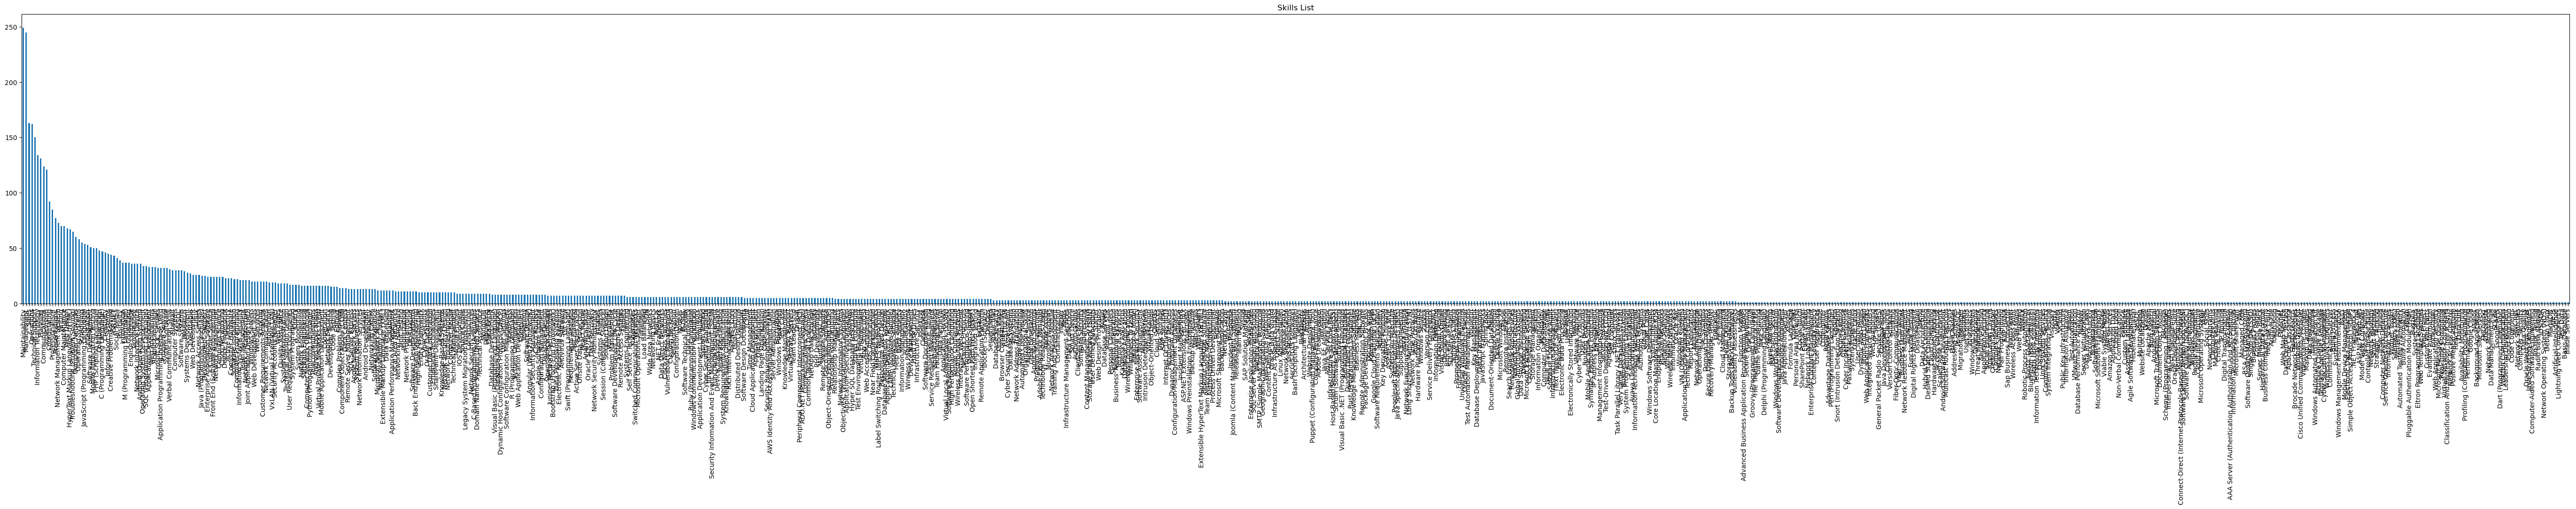

In [17]:
ax = df_result['skills_list'].value_counts().plot(kind='bar',
                                    figsize=(70,8),
                                    title="Skills List")

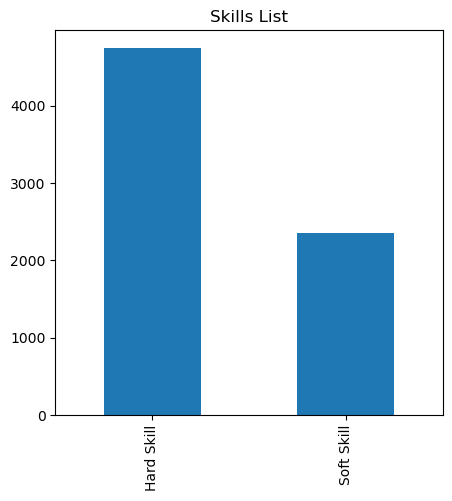

In [18]:
ax = df_result['skill_type'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Skills List")

In [19]:
df_result.head()

skills_list        Date  skill_type
0              Management  04/20/2023  Soft Skill
1              Management  04/20/2023  Soft Skill
2  Information Technology  04/19/2023  Soft Skill
3  Information Technology  04/19/2023  Soft Skill
4              Governance  04/19/2023  Soft Skill

In [20]:
df_result.value_counts(subset=['skills_list','skill_type'])

skills_list          skill_type
Maintainability      Hard Skill    249
Management           Soft Skill    245
Sales                Soft Skill    163
Operations           Soft Skill    162
Technical Support    Hard Skill    150
                                  ... 
Red Hat Linux        Hard Skill      1
Real-Time Computing  Hard Skill      1
Business Operations  Soft Skill      1
React Redux          Hard Skill      1
Secure Programming   Hard Skill      1
Length: 869, dtype: int64

In [21]:
pd.DataFrame(df_result.value_counts(subset=['skills_list','skill_type'])).to_excel("files\Wadhefa.xlsx")

# **BAYT Data**

In [22]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Reading file

In [37]:
df3 = pd.read_excel('web secraping\Bayt_Data_final.xlsx')
df3.head()

Unnamed: 0                             Job Name          Date  \
0           1      أخصائي حاسب آلي / IT specialist   23 days ago   
1           2                        IT Specialist  30+ days ago   
2           3                        IT Specialist    2 days ago   
3           4                        IT Specialist    6 days ago   
4           5  Director - IT Risk and Architecture    4 days ago   

                                                Link  
0  https://www.bayt.com/en/saudi-arabia/jobs/%D8%...  
1  https://www.bayt.com/en/saudi-arabia/jobs/it-s...  
2  https://www.bayt.com/en/saudi-arabia/jobs/it-s...  
3  https://www.bayt.com/en/saudi-arabia/jobs/it-s...  
4  https://www.bayt.com/en/saudi-arabia/jobs/dire...

In [38]:
#df3['Link']

In [39]:
list_of_link_column = df3['Link'].tolist()

In [40]:
len(list_of_link_column)

2700

# Collect  job_description

In [41]:
#%pip install webdriver_manager

In [42]:
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.firefox.service import Service
from selenium.common.exceptions import NoSuchElementException
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

from datetime import date, timedelta
import random

In [43]:
def visibility_of_element_located_updated(locator):
    """An expectation for checking that an element is present on the DOM of a
    page and visible. Visibility means that the element is not only displayed
    but also has a height and width that is greater than 0.

    locator - used to find the element
    returns the WebElement once it is located and visible
    """

    def _predicate(driver):
        try:
            tt = driver.find_element(*(By.ID, "view_inner"))
            if not tt:
                tt = driver.find_element(*(By.ID, "job_card"))
            return _element_if_visible(tt.find_element(*locator))
        except StaleElementReferenceException:
            return False

    return _predicate

def visibility_of_element_located_updated2(locator):
    """An expectation for checking that an element is present on the DOM of a
    page and visible. Visibility means that the element is not only displayed
    but also has a height and width that is greater than 0.

    locator - used to find the element
    returns the WebElement once it is located and visible
    """

    def _predicate(driver):
        try:
            tt = driver.find_element(*(By.ID, "job_card"))
            return _element_if_visible(tt.find_element(*locator))
        except StaleElementReferenceException:
            return False

    return _predicate

def _element_if_visible(element, visibility=True):
    return element if element.is_displayed() == visibility else False

In [45]:
#options = Options()        
#options.binary_location = "/usr/bin/google-chrome"                                                                  
#driver = webdriver.Chrome(chrome_options=options, executable_path='/usr/bin/chromedriver')
#print("Chrome Browser Invoked successfully")

import datetime


options = Options()
#chrome_options = Options()
# options.binary_location = "C:\\Program Files\\Google\Chrome\\Application\\chrome.exe" 
# driver = webdriver.Chrome(chrome_options=options, executable_path=r'C:\Users\a\Downloads\chromedriver_win32\chromedriver.exe')
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
print("Chrome Browser Invoked successfully")


job_description = []
dates = []
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.5563.65 Safari/537.36'}
attempt = 1
wait = WebDriverWait(driver, 10)

for i in range(len(list_of_link_column)):
    URL = list_of_link_column[i]
    driver.get(URL)
    try :
        wait.until(
          EC.any_of(
            visibility_of_element_located_updated((By.CLASS_NAME, "card-content")),
            visibility_of_element_located_updated2((By.CLASS_NAME, "card-content"))
          )
        )
    except Exception as e:
        job_description.append("?")
        dates.append("")
        #print(i)
        #print(URL)
        #print(job_description)
        #print(dates)
        continue
    soup = BeautifulSoup(driver.page_source, "html.parser")
    #print(i)
    #print(URL)
    
    if soup.find('div', class_='card-content t-small bt p20'):
        #print('aaaaaaaaaa')
        description = soup.find('div', class_='card-content t-small bt p20')
        sep = "Job Details"
        sep2 = "Download App"
        stripped = description.text.split(sep, 1)[0]
        if sep2 in stripped:
            stripped2 = stripped.split(sep2, 1)[1]
            job_description.append(stripped2)
        else:
            job_description.append(stripped)
        #print(job_description)
        
        try:
            date_ = driver.find_element(By.XPATH, "/html/body/div[3]/section/div[1]/div[1]/div[2]/div/ul/li[3]/span[1]").text
            # To avoid ValueError: Length of values does not match length of index
            while date_ == "":
                driver.refresh()
                date_ = driver.find_element(By.XPATH, "/html/body/div[3]/section/div[1]/div[1]/div[2]/div/ul/li[3]/span[1]").text
                
            date_now = date.today()
            
            if "Today" in date_:
                date_ = date_now.isoformat()
                dates.append(date_)
                
            elif "Yesterday" in date_:
                date_ = (date_now - timedelta(days=1)).isoformat()
                dates.append(date_)
                
            elif "minute ago" in date_:
                date_ = date_now.isoformat()
                dates.append(date_)
                
            elif "minutes ago" in date_:
                date_ = date_now.isoformat()
                dates.append(date_)    
            
            elif "hour ago" in date_:
                date_ = date_now.isoformat()
                dates.append(date_)
            
            elif "hours ago" in date_:
                date_ = date_now.isoformat()
                dates.append(date_)
                
            elif "day ago" in date_:
                date_ = (date_now - timedelta(days=1)).isoformat()
                dates.append(date_)
                
            elif "days ago" in date_:
                if "30+ days ago" in date_:
                    start = date(2022, 1, 1)
                    end = date(2022, 12, 31)
                    
                    # getting days between dates
                    dates_difference = end - start
                    total_days = dates_difference.days
                    
                    # to get only one day in range with random
                    K = 1
                      
                    res = []
                    for idx in range(K):
                        random.seed()
                          
                        # getting random days
                        ran_day = random.randrange(total_days)
                          
                        # getting random dates
                        res.append((start + timedelta(days=ran_day)).isoformat())
                      
                    # printing
                    dates.append(str(res[0]))
                    # print("K random dates in range : " + str(res[0]))
                else:
                    date_number = [int(i) for i in date_.split() if i.isdigit()]
                    date_number = date_number[0]
                    date_ = (date_now - timedelta(days = date_number)).isoformat()
                    dates.append(date_)
            else:
                dates.append('N/A')
                    
        # This Error means that date is in this (By.CSS_SELECTOR, "span.p20l-d.p10y-m.u-block-m")
        # and this means that date = 30+ days ago
        # so we do random date in the next lines.
        except NoSuchElementException:
            start = date(2022, 1, 1)
            end = date(2022, 12, 31)
            
            # getting days between dates
            dates_difference = end - start
            total_days = dates_difference.days
            
            # to get only one day in range with random
            K = 1
              
            res = []
            for idx in range(K):
                random.seed()
                  
                # getting random days
                ran_day = random.randrange(total_days)
                  
                # getting random dates
                res.append((start + timedelta(days=ran_day)).isoformat())
              
            # printing
            dates.append(str(res[0]))
            # print("K random dates in range : " + str(res[0]))
            
    if soup.find('div', class_='card-content is-spaced'):
        #print('bbbbbbbb')
        description = soup.find_all('div', class_='card-content is-spaced')
        stripped1 = ""
        for desc in description:
            stripped1 = stripped1 + desc.text
        
        date_ = driver.find_element(By.XPATH, "/html/body/div[3]/section/div[1]/div[1]/div[2]/div/ul/li[3]/span[1]").text
            
        #print(job_description)
        
       
        
        # To avoid ValueError: Length of values does not match length of index
        while date_ == "":
            driver.refresh()
            date_ = driver.find_element(By.XPATH, "/html/body/div[3]/section/div[1]/div[1]/div[2]/div/ul/li[3]/span[1]").text
                      
        date_now = date.today()
        
        if "Today" in date_:
            date_ = date_now.isoformat()
            dates.append(date_)
                
        elif "Yesterday" in date_:
            date_ = (date_now - timedelta(days=1)).isoformat()
            dates.append(date_)
            
        elif "minute ago" in date_:
            date_ = date_now.isoformat()
            dates.append(date_)
            
        elif "minutes ago" in date_:
            date_ = date_now.isoformat()
            dates.append(date_)    
            
        elif "hour ago" in date_:
            date_ = date_now.isoformat()
            dates.append(date_)
            
        elif "hours ago" in date_:
            date_ = date_now.isoformat()
            dates.append(date_)
            
        elif "day ago" in date_:
            date_ = (date_now - timedelta(days=1)).isoformat()
            dates.append(date_)
            
        elif "days ago" in date_:
            if "30+ days ago" in date_:
                start = date(2022, 1, 1)
                end = date(2022, 12, 31)
                
                # getting days between dates
                dates_difference = end - start
                total_days = dates_difference.days
                
                # to get only one day in range with random
                K = 1
                  
                res = []
                for idx in range(K):
                    random.seed()
                      
                    # getting random days
                    ran_day = random.randrange(total_days)
                      
                    # getting random dates
                    res.append((start + timedelta(days=ran_day)).isoformat())
                  
                # printing
                dates.append(str(res[0]))
                # print("K random dates in range : " + str(res[0]))
            else:
                date_number = [int(i) for i in date_.split() if i.isdigit()]
                date_number = date_number[0]
                date_ = (date_now - timedelta(days = date_number)).isoformat()
                dates.append(date_)
                #print(job_description)
                #print(dates)
        else:
            dates.append('N/A')
     
        if soup.find('div', class_='card-content is-spaced t-break print-break-before'):
            description = soup.find('div', class_='card-content is-spaced t-break print-break-before')
            stripped2 = description.text
            stripped3 = stripped1 + " " + stripped2
            job_description.append(stripped3)
            #print(job_description)
            #print(dates)
            
        else:
            job_description.append(stripped1)
            #print(job_description)
            #print(dates)
            
    if soup.find("div", class_="m20x p20"):
        job_description.append("?")
        dates.append("")
        #print(i+1)

    #print(dates)
        
driver.quit()
print("done")

Chrome Browser Invoked successfully
done


In [46]:
df3['Date'] = dates
df3['job_description'] = job_description

In [47]:
df3.head()

Unnamed: 0                             Job Name        Date  \
0           1      أخصائي حاسب آلي / IT specialist  2023-03-31   
1           2                        IT Specialist  2022-04-10   
2           3                        IT Specialist  2023-04-21   
3           4                        IT Specialist  2023-04-17   
4           5  Director - IT Risk and Architecture  2023-04-19   

                                                Link  \
0  https://www.bayt.com/en/saudi-arabia/jobs/%D8%...   
1  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
2  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
3  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
4  https://www.bayt.com/en/saudi-arabia/jobs/dire...   

                                     job_description  
0  \nJob Description\n\nDuties and Responsibiliti...  
1  \nJob Description\n\nمطلوب موظف itإدارة ومتابع...  
2  \nJob Description\n\nجدةشركة كبرى في مجال الاس...  
3  \nJob Description\n\nCarry out assignments as ...  
4  \nJob Description\n\nThe Director - IT Risk an...

In [48]:
df3['job_description']

0       \nJob Description\n\nDuties and Responsibiliti...
1       \nJob Description\n\nمطلوب موظف itإدارة ومتابع...
2       \nJob Description\n\nجدةشركة كبرى في مجال الاس...
3       \nJob Description\n\nCarry out assignments as ...
4       \nJob Description\n\nThe Director - IT Risk an...
                              ...                        
2695    \nJob Description\n\nAramco energizes the worl...
2696    \nJob Description\n\nAccount DirectorAccount D...
2697    \nJob Description\n\nOVERVIEWPositionDirector ...
2698    \nJob Description\n\nRETAIL & DISTRIBUTION · R...
2699    \nJob Description\n\nSkills: SlicklineExperien...
Name: job_description, Length: 2700, dtype: object

In [49]:
df3.to_csv('files\Bayt_job_data.csv')

**NLP**

In [23]:
df4 = pd.read_csv('files\Bayt_job_data.csv')

In [24]:
df4.head()

Unnamed: 0.1  Unnamed: 0                             Job Name        Date  \
0             0           1      أخصائي حاسب آلي / IT specialist  2023-03-31   
1             1           2                        IT Specialist  2022-04-10   
2             2           3                        IT Specialist  2023-04-21   
3             3           4                        IT Specialist  2023-04-17   
4             4           5  Director - IT Risk and Architecture  2023-04-19   

                                                Link  \
0  https://www.bayt.com/en/saudi-arabia/jobs/%D8%...   
1  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
2  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
3  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
4  https://www.bayt.com/en/saudi-arabia/jobs/dire...   

                                     job_description  
0  \nJob Description\n\nDuties and Responsibiliti...  
1  \nJob Description\n\nمطلوب موظف itإدارة ومتابع...  
2  \nJob Description\n\nجدةشركة كبرى في مجال الاس...  
3  \nJob Description\n\nCarry out assignments as ...  
4  \nJob Description\n\nThe Director - IT Risk an...

In [25]:
#df4['Link'][3]

In [26]:
#df4['job_description'][3]

## Cleaning dataset 

In [27]:
## Lower case
df4['job_description'] = df4['job_description'].apply(lambda x: " ".join(x.lower()for x in str(x).split()))
## remove tabulation and punctuation
df4['job_description'] = df4['job_description'].str.replace('[^\w\s]',' ')
## digits
df4['job_description'] = df4['job_description'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
df4['job_description'] = df4['job_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
df4['job_description'] = df4['job_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Remove duplicates
#s1 = df4.drop_duplicates(subset=["job_description"], keep="last")
#df4 = pd.concat([s1])

df4.head()

C:\Users\a\AppData\Local\Temp\ipykernel_16172\3271774489.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df4['job_description'] = df4['job_description'].str.replace('[^\w\s]',' ')
C:\Users\a\AppData\Local\Temp\ipykernel_16172\3271774489.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df4['job_description'] = df4['job_description'].str.replace('\d+', '')


Unnamed: 0.1  Unnamed: 0                             Job Name        Date  \
0             0           1      أخصائي حاسب آلي / IT specialist  2023-03-31   
1             1           2                        IT Specialist  2022-04-10   
2             2           3                        IT Specialist  2023-04-21   
3             3           4                        IT Specialist  2023-04-17   
4             4           5  Director - IT Risk and Architecture  2023-04-19   

                                                Link  \
0  https://www.bayt.com/en/saudi-arabia/jobs/%D8%...   
1  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
2  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
3  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
4  https://www.bayt.com/en/saudi-arabia/jobs/dire...   

                                     job_description  
0  job description duty responsibilitiesالمعرفة ب...  
1  job description مطلوب موظف itإدارة ومتابعة عمل...  
2  job description جدةشركة كبرى في مجال الاستشارا...  
3  job description carry assignment directed mana...  
4  job description director risk architecture bas...

In [28]:
## Delete job description
df4['job_description'] = df4['job_description'].str.replace('job description', '')

In [29]:
df4.head()

Unnamed: 0.1  Unnamed: 0                             Job Name        Date  \
0             0           1      أخصائي حاسب آلي / IT specialist  2023-03-31   
1             1           2                        IT Specialist  2022-04-10   
2             2           3                        IT Specialist  2023-04-21   
3             3           4                        IT Specialist  2023-04-17   
4             4           5  Director - IT Risk and Architecture  2023-04-19   

                                                Link  \
0  https://www.bayt.com/en/saudi-arabia/jobs/%D8%...   
1  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
2  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
3  https://www.bayt.com/en/saudi-arabia/jobs/it-s...   
4  https://www.bayt.com/en/saudi-arabia/jobs/dire...   

                                     job_description  
0   duty responsibilitiesالمعرفة بالأنظمة والأوام...  
1   مطلوب موظف itإدارة ومتابعة عمل شبكة الحاسوب ا...  
2   جدةشركة كبرى في مجال الاستشارات والتدريب تبحث...  
3   carry assignment directed manager ensuring pr...  
4   director risk architecture based riyadh contr...

In [30]:
df4.to_excel("files\Bayt_job_data.xlsx")

In [31]:
# imports
import spacy
from spacy.matcher import PhraseMatcher

# load default skills data base
from skillNer.general_params import SKILL_DB
# import skill extractor
from skillNer.skill_extractor_class import SkillExtractor

# init params of skill extractor
nlp = spacy.load("en_core_web_lg")
# init skill extractor
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)
print("done")

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...
done


In [32]:
skills = pd.read_excel("Skills.xlsx")
skills.to_csv("Skills.csv")

skills_csv = pd.read_csv("Skills.csv")

new_stopwords = skills_csv["Skills"].tolist()
new_stopwords

['Agile Coaching',
 'Agile Leadership',
 'Agile Management',
 'Agile Methodology',
 'Agile Modeling',
 'Agile Project Management',
 'Agile Projects',
 'Agile Software Development',
 'Agile Testing',
 'Backlogs',
 'Behavior-Driven Development',
 'Disciplined Agile Delivery',
 'Dynamic Systems Development Methods',
 'Extreme Programming',
 'Feature-Driven Development (FDD)',
 'Iterative And Incremental Development',
 'JIRA',
 'Jira Align',
 'Oracle Agile',
 'Pair Programming',
 'Pivotal Tracker (Software)',
 'Product Backlog Grooming',
 'Rally Software',
 'RallyDev',
 'Rapid Application Development',
 'Redmine',
 'Scaled Agile Framework',
 'Scrum (Software Development)',
 'Sprint Backlogs',
 'Sprint Planning',
 'Sprint Retrospectives',
 'Story Point Estimation',
 'Test-Driven Development (TDD)',
 'Timeboxing',
 'Unified Process',
 'VersionOne',
 'ZenHub',
 '.NET Remoting',
 'Amazon API Gateway',
 'Amazon Product Advertising API',
 'API Design',
 'API Gateway',
 'API Management',
 'API Th

In [33]:
value_result = []
value_skill = []
dates = []
for i in range(df4.shape[0]):
    job_description = df4['job_description'][i]
    try:
        annotations = skill_extractor.annotate(job_description)
    except:
        print(i)
        print("IndexError: list index out of range")
        continue
    for type_matching, arr_skills in annotations["results"].items():
        for skill in arr_skills:
            if SKILL_DB[skill["skill_id"]]["skill_name"] in new_stopwords:
                value_result.append(SKILL_DB[skill["skill_id"]]["skill_name"])
                value_skill.append(SKILL_DB[skill["skill_id"]]["skill_type"])
                dates.append(df4['Date'][i])
print("done")

C:\Users\a\anaconda3\lib\site-packages\skillNer\utils.py:99: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  vec_similarity = token1.similarity(token2)


done


In [34]:
#df4['Date'][1]

In [35]:
df_result5 = pd.DataFrame(value_result, columns=['skills_list'])
df_result5['Date'] = dates
df_result5

skills_list        Date
0      Information Technology  2023-03-31
1        Software Development  2022-04-10
2      Information Technology  2022-04-10
3      Information Technology  2023-04-21
4                  Consulting  2023-04-21
...                       ...         ...
57431              Positivity  2023-04-16
57432             Supervision  2023-04-16
57433             Supervision  2023-04-16
57434              Management  2023-04-16
57435        English Language  2023-04-16

[57436 rows x 2 columns]

In [36]:
df_result5.to_excel("files\Bayt_for_Prediction.xlsx")
df_result5.to_csv("Bayt_for_Prediction.csv")

In [37]:
df_result5['skill_type'] = value_skill
df_result5

skills_list        Date  skill_type
0      Information Technology  2023-03-31  Soft Skill
1        Software Development  2022-04-10  Hard Skill
2      Information Technology  2022-04-10  Soft Skill
3      Information Technology  2023-04-21  Soft Skill
4                  Consulting  2023-04-21  Soft Skill
...                       ...         ...         ...
57431              Positivity  2023-04-16  Soft Skill
57432             Supervision  2023-04-16  Soft Skill
57433             Supervision  2023-04-16  Soft Skill
57434              Management  2023-04-16  Soft Skill
57435        English Language  2023-04-16  Soft Skill

[57436 rows x 3 columns]

In [38]:
df_result5.head()

skills_list        Date  skill_type
0  Information Technology  2023-03-31  Soft Skill
1    Software Development  2022-04-10  Hard Skill
2  Information Technology  2022-04-10  Soft Skill
3  Information Technology  2023-04-21  Soft Skill
4              Consulting  2023-04-21  Soft Skill

In [39]:
df_result5.value_counts(subset=['skills_list','skill_type','Date'])

skills_list       skill_type  Date      
Operations        Soft Skill  2023-04-21    514
Management        Soft Skill  2023-04-19    483
                              2023-04-21    436
                              2023-04-22    412
Positivity        Soft Skill  2023-04-22    411
                                           ... 
Network Security  Hard Skill  2022-07-26      1
                              2022-07-02      1
                              2022-06-15      1
Compilers         Hard Skill  2022-06-02      1
Zoom Rooms        Hard Skill  2022-12-19      1
Length: 10467, dtype: int64

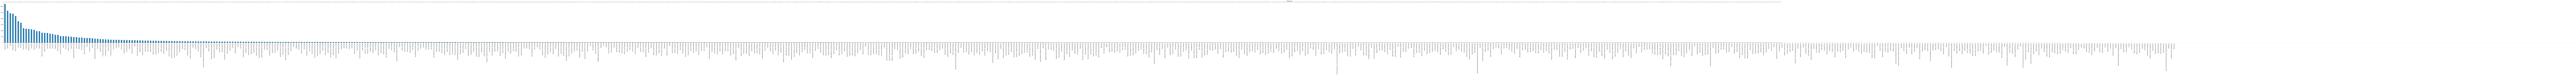

In [40]:
ax = df_result5['skills_list'].value_counts().plot(kind='bar',
                                    figsize=(500,8),
                                    title="Skills List")

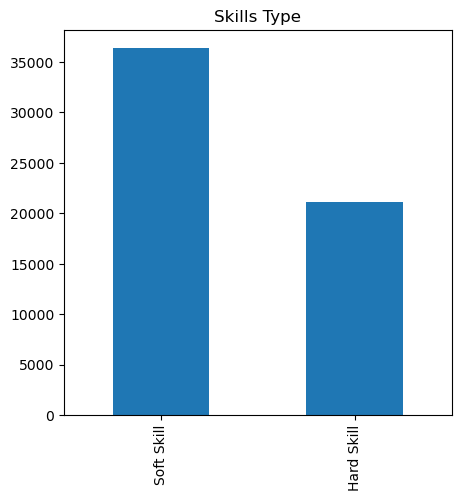

In [41]:
ax = df_result5['skill_type'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Skills Type")

In [42]:
pd.DataFrame(df_result5.value_counts(subset=['skills_list','skill_type','Date'])).to_excel("files\Bayt.xlsx")

## Merge Data

In [43]:
df1 = df_result.value_counts(subset=['skills_list','skill_type'])
df2 = df_result5.value_counts(subset=['skills_list','skill_type'])

In [44]:
merge_data = pd.concat([df1, df2]).groupby(['skills_list', 'skill_type']).sum()
merge_data

skills_list                                               skill_type
.NET Framework                                            Hard Skill     6
.NET Framework 4                                          Hard Skill     5
5G Technology                                             Hard Skill     2
AAA Server (Authentication Authorization And Accounting)  Hard Skill     1
ADO.NET (Programming Language)                            Hard Skill     5
                                                                        ..
Xgboost                                                   Hard Skill     2
YAML                                                      Hard Skill     1
Zabbix                                                    Hard Skill     2
Zebra Printers                                            Hard Skill     2
Zoom Rooms                                                Hard Skill    32
Length: 1298, dtype: int64

In [45]:
#pd.DataFrame(merge_data).to_excel("Merge Data.xlsx")
pd.DataFrame(merge_data).to_excel("Merge Data_final.xlsx")
pd.DataFrame(merge_data).to_csv("files\Merge Data_final.csv") # CSV File

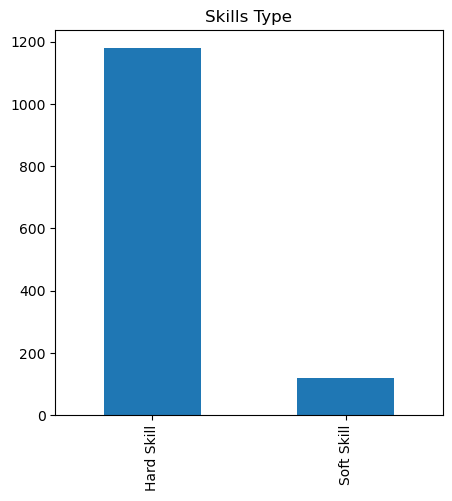

In [4]:
mg = pd.read_excel("Merge Data_final.xlsx")
ax = mg['skill_type'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Skills Type")